In [469]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn
# %pip install spotipy

In [470]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("data/tracks.csv")

# Creating the dataframe
df = pd.DataFrame(dataset)

df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [471]:
# Spotify API Authentication Information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#weilin's api key
client_id = '169bbab461424df7a16d00fbdb3201ec'
client_secret = '19fb464d5e34444aa5faa4613d35f6b6'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [472]:
df_fill_null = df.copy()

df_fill_null['name'] = df.apply(
    lambda row: sp.track(f"spotify:track:{row['id']}")['name'] if pd.isnull(row['name']) else row['name'], axis=1)
df_fill_null.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [473]:
df_fill_null.iloc[226336,1]

# Removing rows without song name.
df_removed = df.dropna()
df_removed.isnull().sum()
df_removed.count()
df_removed.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [474]:
df_removed['year'] = df_removed['release_date'].str.extract(r'(\d{4})').astype(int)
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\123742635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['year'] = df_removed['release_date'].str.extract(r'(\d{4})').astype(int)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [475]:
# Converting release_date feature to datetime format, and extracting the year.
# df_removed['release_date_datetime'] = pd.to_datetime(df_removed['release_date'], errors='coerce')
# df_removed["year"] = df_removed["release_date_datetime"].dt.year
# df_removed.head()

In [476]:
# Creating a new feature that comprises of Song Name and Artist.
df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\3212663003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,Carve['Uli']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,Capítulo 2.16 - Banquero Anarquista['Fernando ...
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,Vivo para Quererte - Remasterizado['Ignacio Co...
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,El Prisionero - Remasterizado['Ignacio Corsini']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,Lady of the Evening['Dick Haymes']


In [477]:
# Removing all duplicate songs-artist pairs. Meaning that there won't be 2 of the same song sung by the same artist.
print(df_removed.shape)
df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)
print(df_removed.shape)

(586601, 22)
(526609, 22)


C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\3753207886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)


In [478]:
# Filter data to keep songs published 2000* and later.
df_removed = df_removed[df_removed["year"] >= 2000]
print(df_removed.shape)

(187472, 22)


# Input your data here

In [479]:
# Using Spotify API to search for a song's information based on input and adding the necessary information in a DataFrame.
input = 'Glimpse of us'

def search_track(track_name):
    # Search for the track
    results = sp.search(q=track_name, type='track')

    # Check if the track exists
    if results['tracks']['total'] > 0:
        # Get the first track from the results
        track = results['tracks']['items'][0]
        explicit = int(track["explicit"] == True)
        print(f'Found track: {track["name"]} by {track["artists"][0]["name"]} from the album {track["album"]["name"]}.')
        track_dict = {"id": track["id"], "name": track["name"], "popularity": track["popularity"], 
                      "duration_ms": track["duration_ms"], "explicit": explicit, "artists": track["artists"][0]["name"],
                      "id_artists": track["artists"][0]["id"], "release_date": track["album"]["release_date"]}
        return track_dict
    else:
        print('Track not found')
        return None

# Creating a Single Row DataFrame for the input song.
track_result = search_track(input)
td = pd.DataFrame(track_result, index=[0])
td

Found track: Glimpse of Us by Joji from the album Glimpse of Us.


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date
0,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,84,233456,0,Joji,3MZsBdqDrRTJihTHQrO6Dq,2022-06-10


In [480]:
# Obtaining Feature Data from song based on its song_id from previous function and adding them to a DataFrame.
def get_audio_features(track_result):
    song_id = track_result["id"]
    results = sp.audio_features(song_id)

    if results:
        return results[0]
    else:
        print(f'No audio features found for song ID: {song_id}')
        return None

audio_features = get_audio_features(track_result)
af = pd.DataFrame(audio_features, index=[0])
# Taking out the irrevelant features.
af_formatted = af.drop(["type", "id", "uri", "track_href", "analysis_url", "duration_ms"], axis=1)
# Merging both DataFrames to sync up with the dataset's layout.
td = pd.concat([td, af_formatted], axis=1)
td['year'] = td['release_date'].str.extract(r'(\d{4})').astype(int)

In [481]:
td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,84,233456,0,Joji,3MZsBdqDrRTJihTHQrO6Dq,2022-06-10,0.44,0.317,...,-9.258,1,0.0531,0.891,0.000005,0.141,0.268,169.914,3,2022


In [482]:
# Adding the Input Song to the Dataset DataFrame. Added to the very front.
new_df = pd.concat([td, df_removed], ignore_index=True)
new_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
0,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,84,233456,0,Joji,3MZsBdqDrRTJihTHQrO6Dq,2022-06-10,0.440,0.317,...,1,0.0531,0.891,0.000005,0.141,0.268,169.914,3,2022,NaN
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,2008,You'll Never Walk Alone - Mono; 2002 Remaster[...
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,2020,A Lover's Concerto['The Toys']
3,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,2008,Ferry Cross the Mersey - Mono; 2002 Remaster['...
4,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,2008,Don't Let the Sun Catch You Crying (Main) - Mo...


In [483]:
# Recalibrating the Index.
# new_df = new_df.reset_index(drop=True)
# new_df.head()

# Checking loudness values.
new_df["loudness"].describe()

count    187473.000000
mean         -7.491312
std           3.866930
min         -60.000000
25%          -8.867000
50%          -6.695000
75%          -5.082000
max           2.854000
Name: loudness, dtype: float64

In [484]:
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection, removing non-useful rows.
def processing(new_df):
    df2 = new_df.drop(['id', 'name', 'id_artists', 'release_date', 'popularity', 'mode', "song_name_artist"], axis=1)
    
    # Normalize numerical features
    numerical_features = ['duration_ms', 'loudness', 'tempo']
    scaler = MinMaxScaler()
    df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
    
    # Standardise Year
    df2['standardized_year'] = scaler.fit_transform(df2[['year']])
    df2 = df2.drop(['year'], axis=1)

    # Create a feature matrix
    feature_matrix = df2.drop(['artists'], axis=1)
    # This is the input song. We are isolating it from the dataframe first.
    input = feature_matrix.iloc[0].T
    # This is the rest of the songs.
    feature_matrix = feature_matrix.iloc[1:]

    # Apply cosine similarity
    start = 0
    end = 1000
    arr = []
    
    # Returns comparison value of first song in dataset to all others in an array.
    # DataFrame can be customised before Feature Selection to change which song the subject of comparison should be.
    while end < feature_matrix['explicit'].count():
        # Compile the nth 1,000 songs in the dataframe.
        set = feature_matrix.iloc[start:end].T
        # Add the input song to the top of the dataframe.
        compare_df = pd.concat([input, set], axis=1).T
        # Perform cosine similarity.
        cosine_sim = cosine_similarity(compare_df) # Comparing bit by bit to prevent too many dimensions.
        cs_list = cosine_sim[0].tolist() # Taking only the first row a.k.a the comparison between the first song and all others.
        arr += cs_list
        # Prepare for the next 1,000 songs.
        start = end
        end += 1000
    return arr
arr = processing(new_df)
arr

[0.9999999999999994,
 0.3912688889856281,
 0.7288531644796721,
 0.9687297816474959,
 0.5863948295012351,
 0.9936089714710835,
 0.9950701744750906,
 0.9899150370380783,
 0.9645731025906404,
 0.5882124632681864,
 0.9701226637263127,
 0.9789506858907099,
 0.9841446933627056,
 0.8054799684056175,
 0.9706416145624313,
 0.38759877005926885,
 0.9920137435892243,
 0.5915988177008131,
 0.9681419421933967,
 0.9720827519541075,
 0.971160435135949,
 0.9966318351767331,
 0.9786809242950868,
 0.9872820900498113,
 0.9771329073657695,
 0.9949074213855428,
 0.9917035450906727,
 0.9929635268582856,
 0.7373379880729936,
 0.9588176772982812,
 0.9414682605568948,
 0.9682864192648791,
 0.9882553925764351,
 0.8082856301295748,
 0.7280267697257037,
 0.9969780428896651,
 0.9882929654526679,
 0.9389729745817221,
 0.9487465776322972,
 0.3860742206051305,
 0.9818462513639993,
 0.8976890508856535,
 0.9792921313957224,
 0.9950109883518778,
 0.9916739056902102,
 0.7408388206092794,
 0.9458239894871174,
 0.5683096271

In [485]:
print(arr[1999])

0.9298343890874324


In [486]:
def compile_suggestions(arr):
    suggestions = []
    
    # Compiling all song ids that are above the pre-determined threshold for 'like the first song'.
    for i in range(len(arr)):
        if (arr[i] * 100) > 99:
            suggestions.append(i)
    
    print(suggestions)
    return suggestions
suggestions = compile_suggestions(arr)

[0, 5, 6, 16, 21, 25, 26, 27, 35, 43, 44, 51, 57, 80, 84, 90, 92, 93, 94, 96, 99, 101, 106, 117, 118, 123, 130, 131, 139, 150, 160, 165, 166, 173, 177, 183, 186, 187, 191, 193, 197, 200, 204, 205, 207, 210, 211, 217, 219, 222, 225, 236, 237, 239, 242, 244, 246, 247, 253, 255, 256, 258, 259, 261, 264, 266, 267, 277, 292, 301, 304, 307, 315, 317, 319, 328, 332, 338, 346, 348, 359, 375, 377, 379, 395, 402, 424, 448, 455, 464, 489, 516, 576, 590, 618, 664, 674, 693, 712, 718, 722, 733, 734, 849, 874, 876, 917, 922, 923, 927, 941, 943, 945, 949, 953, 961, 963, 967, 969, 973, 976, 978, 982, 992, 996, 1001, 1010, 1019, 1022, 1030, 1031, 1034, 1043, 1044, 1059, 1065, 1067, 1071, 1077, 1081, 1091, 1103, 1105, 1107, 1120, 1121, 1132, 1142, 1146, 1161, 1162, 1166, 1169, 1179, 1197, 1199, 1213, 1221, 1229, 1241, 1245, 1267, 1273, 1286, 1297, 1303, 1305, 1309, 1326, 1332, 1353, 1362, 1371, 1373, 1375, 1384, 1399, 1412, 1419, 1427, 1436, 1444, 1461, 1484, 1496, 1503, 1507, 1510, 1513, 1533, 1535, 15

In [487]:
# Extracting out the end result information.
def format_suggestions(suggestions):
    # first = suggestions[1]

    # Creating the new dataframe with the first matched song.
#     main = df_removed.iloc[suggestions].copy()
#     df_main = pd.DataFrame(main)
#     df_main = df_main.T
#    print(df_removed.tail())
    df_main = new_df.loc[suggestions]

    # Adding the rest of the matched songs to the dataframe.
#     for n in range (2, len(suggestions)):
#         temp = df_removed.iloc[suggestions[n],:6].copy()
#         df_temp = pd.DataFrame(temp)
#         df_temp = df_temp.T
#         df_main = pd.concat([df_main, df_temp])

#     df_main = df_main.drop(['popularity', 'duration_ms', 'explicit'], axis=1)
    return df_main

df_main = format_suggestions(suggestions).iloc[1:]
df_main.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
5,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,2018,The September Of My Years - Live At The Sands ...
6,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,...,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,2018,It Was A Very Good Year - Live At The Sands Ho...
16,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.212,...,1,0.0347,0.881,0.000022,0.798,0.441,117.072,3,2020,"The Circle Game - Live at The 2nd Fret, Philad..."
21,4JyPPRoW8y6mA3XA7gKvoL,Intro To The Circle Game - Live at The 2nd Fre...,17,232640,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.565,0.153,...,0,0.3780,0.911,0.000000,0.358,0.434,103.309,4,2020,Intro To The Circle Game - Live at The 2nd Fre...
25,1LOf4Ir6JdvjS97VY33kx1,Intro To What's The Story Mr. Blue - Live at T...,16,61400,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.700,0.164,...,0,0.4030,0.914,0.000000,0.237,0.310,99.184,3,2020,Intro To What's The Story Mr. Blue - Live at T...


In [488]:
# Standardising and Weighting Years.
# from sklearn.preprocessing import StandardScaler
# def weighting(df_main): 
#     df_main['year'] = pd.to_numeric(df_main['year'])
#     scaler = StandardScaler()
#     df_main['standardized_year'] = scaler.fit_transform(df_main[['year']])
#     year_compare = df_main['standardized_year'].loc[0]
#     df_main = df_main.drop
#     return df_main
# df_final = weighting(df_main)
# df_final.head()

In [489]:
df_main.count() # There is one less for the last 3 features as the input song did not go through the extracted year's steps.
# df_final['standardized_year'].describe()

id                  29277
name                29277
popularity          29277
duration_ms         29277
explicit            29277
artists             29277
id_artists          29277
release_date        29277
danceability        29277
energy              29277
key                 29277
loudness            29277
mode                29277
speechiness         29277
acousticness        29277
instrumentalness    29277
liveness            29277
valence             29277
tempo               29277
time_signature      29277
year                29277
song_name_artist    29277
dtype: int64

In [490]:
import random

# Generating 10 of the matched songs at random.
def recommend(df_main):
    print('Here are your recommendations!')
    for c in range(10):
        recc = df_main.sample().to_dict()
        name = list(recc['name'].values())[0]
        artists = (list(recc['artists'].values())[0])[1:len(list(recc['artists'].values())[0])-1]
        year = str(list(recc['year'].values())[0])
        print(str(c + 1) + '. ' + name + ' by ' + artists + 'published in ' + year)
        df_main = df_main.drop(list(recc['id'])[0])
    
# May want to try a filter for repreventing duplicate songs in the list.
recommend(df_main) # End Product

Here are your recommendations!
1. Are You Sleeping? / Frere Jacques by 'Nursery Rhymes 123'published in 2016
2. Wat Is Mijn Hart by 'Marco Borsato'published in 2000
3. Izlaji Me by 'Andrea'published in 2010
4. Flashes by 'Valer den Bit'published in 2017
5. Метелица by 'Freestyle', 'Нина Кирсо', 'Sergey Kuznetsov'published in 2013
6. Išmokyk Mane Šypsotis by '8 Kambarys'published in 2018
7. I Luv Your Girl by 'The-Dream'published in 2007
8. Springfield (feat. Bushido) by 'Shindy', 'Bushido'published in 2013
9. Bleed It Out by 'Linkin Park'published in 2007
10. 不分手的恋爱 by 'Silence Wang'published in 2010


(array([20899., 15314., 15120., 15910., 16518., 26131., 19452., 19367.,
        21409., 17353.]),
 array([2000. , 2002.2, 2004.4, 2006.6, 2008.8, 2011. , 2013.2, 2015.4,
        2017.6, 2019.8, 2022. ]),
 <BarContainer object of 10 artists>)

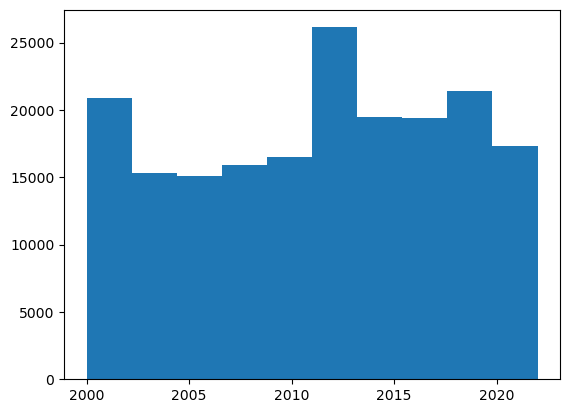

In [491]:
import matplotlib.pyplot as plt

plt.hist(new_df["year"])

# To do:
# Artist Genre and Langauge of Artist to be added.